In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import date

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [44]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [45]:
url_data = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df['Unidade da Federação'] = df["Unidade da Federação"].str[3:]
df = df.drop(columns = ['Total'])

colunas = df.mean().index.tolist()
colunas.insert(0, "Unidade da Federação")
df = df[colunas]
df = df.set_index('Unidade da Federação')
df = df /1e6
df = df.sort_values(by = df.columns.max(), ascending = False)
df.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,...,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,...,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,...,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,...,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,...,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84


In [46]:
mensal = df.T
mensal.tail()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Alagoas,Amazonas,Piauí,Mato Grosso,Sergipe,Rondônia,Acre,Roraima,Amapá,Tocantins
2020/Nov,335.08,175.25,126.86,108.85,86.78,86.26,78.90,68.46,56.92,43.04,...,18.60,19.90,18.91,20.51,12.26,9.36,3.28,3.62,2.22,0.53
2020/Dez,330.49,172.51,120.04,111.76,90.42,85.87,70.98,70.33,50.85,44.15,...,17.81,17.77,20.88,19.58,11.45,8.88,3.70,3.45,2.57,0.68
2021/Jan,355.15,174.72,122.12,119.99,94.18,79.96,83.85,71.97,52.08,46.13,...,17.54,21.43,22.69,19.12,12.06,9.27,3.72,3.27,2.80,0.42
2021/Fev,348.83,177.27,132.62,111.80,85.58,81.99,75.56,74.34,53.17,42.74,...,18.53,25.92,19.40,18.35,13.00,7.73,3.54,3.52,2.82,0.32
2021/Mar,392.95,200.47,140.26,130.16,106.84,98.75,83.87,81.38,62.08,45.59,...,22.12,22.03,20.02,19.61,13.32,11.02,4.08,3.99,3.19,1.36


In [47]:
meses = {
    "Jan":1,
    "Fev":2,
    "Mar":3,
    "Abr":4,
    "Mai":5,
    "Jun":6,
    "Jul":7,
    "Ago":8,
    "Set":9,
    "Out":10,
    "Nov":11,
    "Dez":12
}

def convert_date(ano_mes):
    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    mes_numero = int(meses[mes])
    return date(ano,mes_numero,1)

# Map: aplica a função em todas as linhas do index
mensal.index = mensal.index.map(convert_date)
mensal.index.name = "Data"

In [48]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Alagoas,Amazonas,Piauí,Mato Grosso,Sergipe,Rondônia,Acre,Roraima,Amapá,Tocantins
Data,,,,,,,,,,,,,,,,,,,,,
2008-01-01,91.68,45.67,38.27,30.93,23.03,21.21,14.39,16.50,15.54,15.31,...,6.24,4.74,7.99,4.80,2.78,1.39,0.90,0.66,1.12,3.44
2008-02-01,148.68,70.19,55.38,57.36,28.39,28.19,24.18,25.65,25.74,22.26,...,8.38,7.12,10.08,8.68,3.68,2.93,1.50,0.78,1.27,4.99
2008-03-01,156.09,79.23,53.80,51.55,44.57,34.18,29.99,26.74,28.72,21.44,...,8.41,8.20,10.30,7.89,5.05,1.54,1.79,0.72,0.97,6.21
2008-04-01,161.23,77.14,52.46,56.67,44.05,39.03,34.81,27.18,30.68,20.92,...,9.09,8.26,10.78,8.79,5.05,1.53,1.73,0.84,1.14,4.98
2008-05-01,187.12,80.55,54.42,48.40,44.91,42.95,32.15,26.85,30.60,21.62,...,9.34,7.83,10.40,9.23,4.74,1.65,1.82,0.86,0.87,5.51


<AxesSubplot:xlabel='Data', ylabel='São Paulo'>

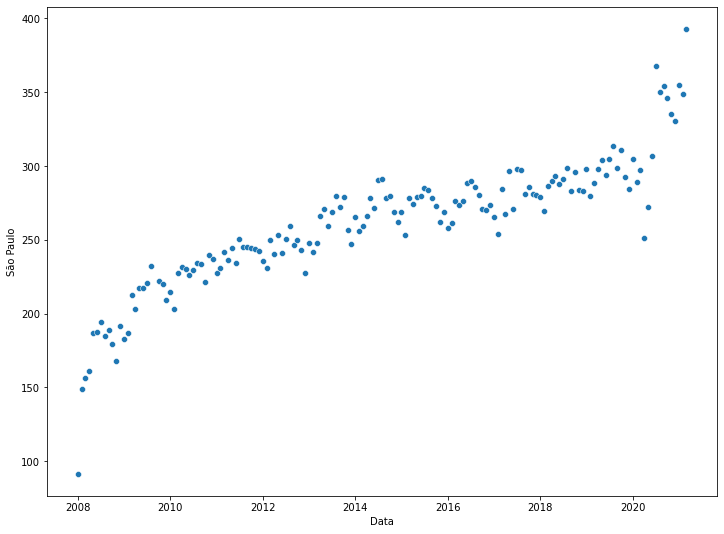

In [49]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'

# Criação da figura 
fig, ax = plt.subplots(figsize = (12,9))
sns.scatterplot(data = data, x = x, y = y)

In [50]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 2008-01-01 to 2021-03-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            158 non-null    float64
 1   Minas Gerais         158 non-null    float64
 2   Paraná               158 non-null    float64
 3   Rio Grande do Sul    158 non-null    float64
 4   Rio de Janeiro       158 non-null    float64
 5   Bahia                158 non-null    float64
 6   Pernambuco           158 non-null    float64
 7   Santa Catarina       158 non-null    float64
 8   Ceará                158 non-null    float64
 9   Goiás                158 non-null    float64
 10  Espírito Santo       158 non-null    float64
 11  Maranhão             158 non-null    float64
 12  Pará                 158 non-null    float64
 13  Distrito Federal     158 non-null    float64
 14  Paraíba              158 non-null    float64
 15  Mato Grosso do Sul   158 non-